In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import cv2
import os
from PIL import Image
from keras.models import Sequential
from keras.layers import Input,Convolution2D,MaxPool2D,Flatten,Dense,Dropout,Convolution3D,MaxPool3D
from keras.utils import np_utils
import tensorflow
from keras.layers.convolutional import Conv3D
from keras.layers.convolutional_recurrent import ConvLSTM2D
from tensorflow.keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

In [ ]:
def drawImage(img, title = "image"):
  imarray = np.array(img)
  plt.title(title+str(imarray.shape))
  plt.imshow(img)
  plt.show()

In [ ]:
from google.colab import drive
drive.mount('/MyDrive')

Mounted at /MyDrive


In [ ]:
dirname = '/MyDrive/MyDrive/DataSet'
timeaccord= []
for fname in os.listdir(dirname):
  timeaccord.append(fname)
timeaccord.sort()


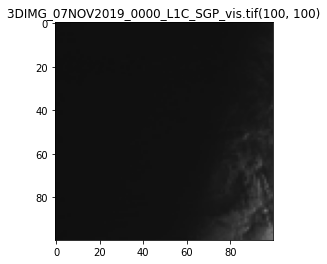

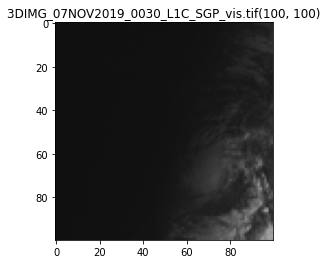

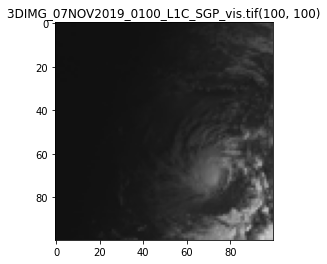

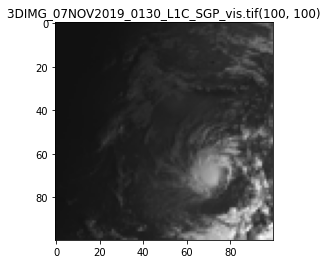

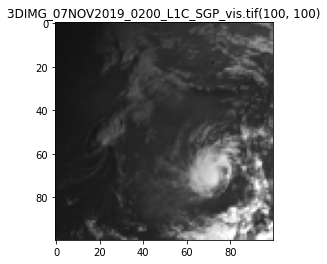

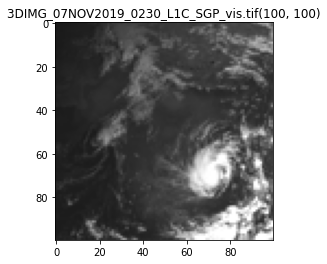

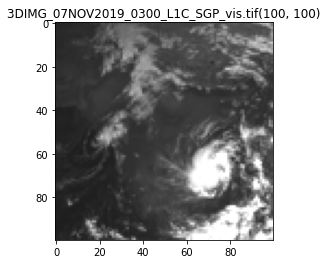

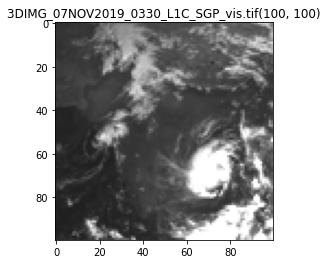

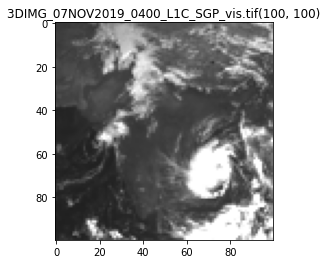

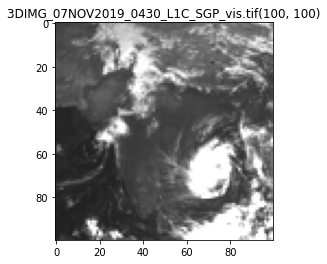

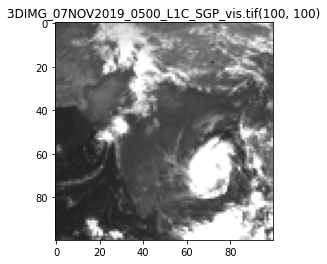

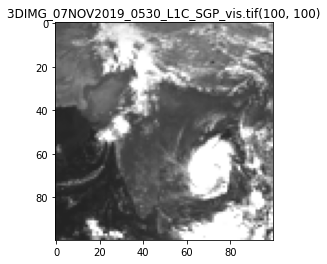

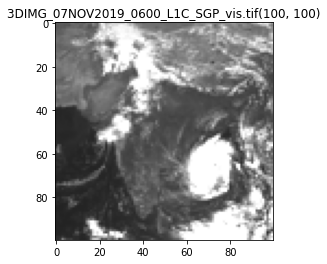

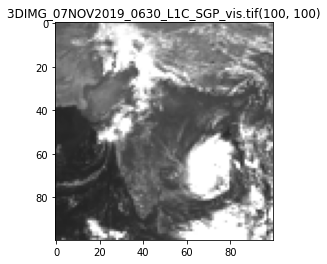

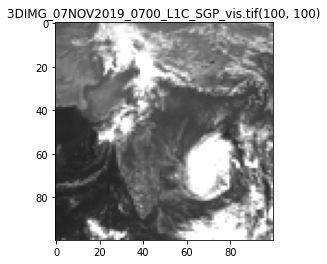

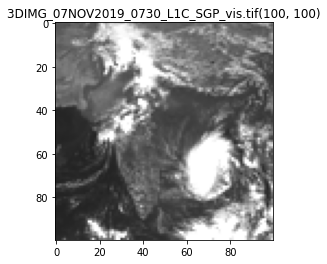

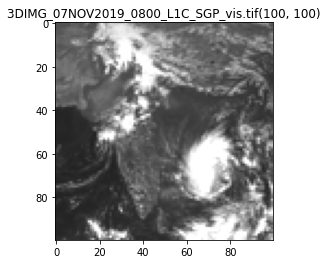

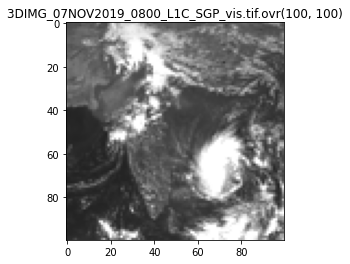

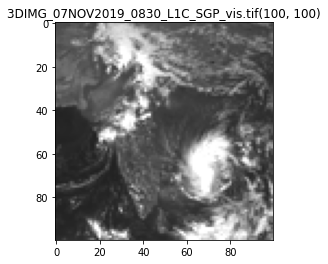

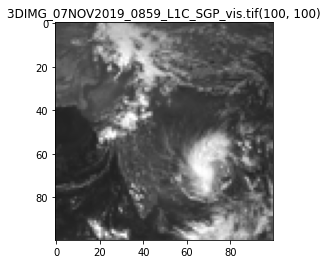

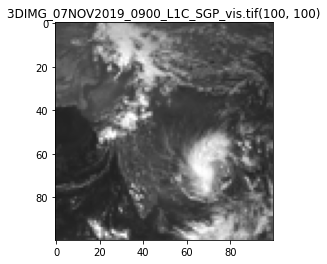

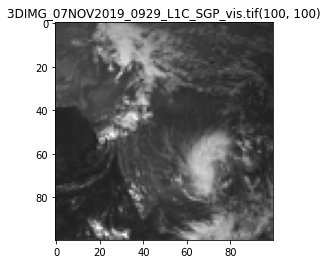

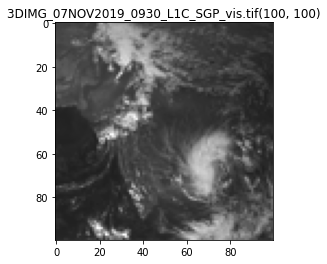

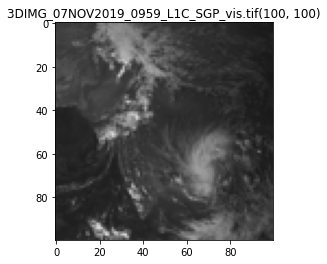

In [ ]:
final = []
for fname in timeaccord[:24]:
    img = Image.open(os.path.join(dirname, fname))
    img = img.resize((100,100))
    drawImage(img,fname)
    imarray = np.array(img)
    final.append(imarray)

In [ ]:

final = np.array(final)
final = final/255
print(final.shape)
x_train = []
y_train = []
for i in range(10,final.shape[0]):
  x_train.append(final[i-10:i])
for i in range(10,final.shape[0]):
  y_train.append(final[i-9:i+1])

(24, 100, 100)


In [ ]:
X_train = np.array(x_train)
Y_train = np.array(y_train)
print(X_train.shape)
print(Y_train.shape)


(14, 10, 100, 100)
(14, 10, 100, 100)


In [ ]:
seq = Sequential()
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),input_shape=(None, 100, 100, 1), padding='same', return_sequences=True))
seq.add(Dropout(0.1))
seq.add(BatchNormalization())


In [ ]:
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3), padding='same', return_sequences=True))
seq.add(Dropout(0.1))
seq.add(BatchNormalization())


In [ ]:
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(Dropout(0.1))
seq.add(BatchNormalization())

In [ ]:
seq.add(ConvLSTM2D(filters=40, kernel_size=(3, 3),padding='same', return_sequences=True))
seq.add(Dropout(0.1))
seq.add(BatchNormalization())

In [ ]:
seq.add(Conv3D(filters=1, kernel_size=(3, 3, 3),activation='sigmoid',padding='same', data_format='channels_last'))
seq.add(Dropout(0.1))


In [ ]:
seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_lstm2d (ConvLSTM2D)    (None, None, 100, 100, 4  59200     
                             0)                                  
                                                                 
 dropout (Dropout)           (None, None, 100, 100, 4  0         
                             0)                                  
                                                                 
 batch_normalization (BatchN  (None, None, 100, 100, 4  160      
 ormalization)               0)                                  
                                                                 
 conv_lstm2d_1 (ConvLSTM2D)  (None, None, 100, 100, 4  115360    
                             0)                                  
                                                                 
 dropout_1 (Dropout)         (None, None, 100, 100, 4  0

In [ ]:
seq.compile(loss='binary_crossentropy', optimizer='adadelta')


In [ ]:
checkpoint = ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', patience=2)
hist = seq.fit(X_train.reshape((14,10,100,100,1)), Y_train.reshape((14,10,100,100,1)), batch_size=10,
        epochs=32, validation_split=0.2,callbacks=[checkpoint,early])

Epoch 1/32
2/2 [==============================] - 135s 19s/step - loss: 1.7181 - val_loss: 0.6929
Epoch 2/32
2/2 [==============================] - 123s 18s/step - loss: 1.7085 - val_loss: 0.6928
Epoch 3/32
2/2 [==============================] - 120s 18s/step - loss: 1.6949 - val_loss: 0.6927
Epoch 4/32
2/2 [==============================] - 118s 17s/step - loss: 1.6848 - val_loss: 0.6925
Epoch 5/32
2/2 [==============================] - 116s 17s/step - loss: 1.6830 - val_loss: 0.6924
Epoch 6/32
2/2 [==============================] - 117s 17s/step - loss: 1.6668 - val_loss: 0.6923
Epoch 7/32
2/2 [==============================] - 125s 17s/step - loss: 1.6704 - val_loss: 0.6921
Epoch 8/32
2/2 [==============================] - 119s 18s/step - loss: 1.6615 - val_loss: 0.6920
Epoch 9/32
2/2 [==============================] - 132s 18s/step - loss: 1.6561 - val_loss: 0.6919
Epoch 10/32
2/2 [==============================] - 126s 18s/step - loss: 1.6443 - val_loss: 0.6918
Epoch 11/32
2/2 [==

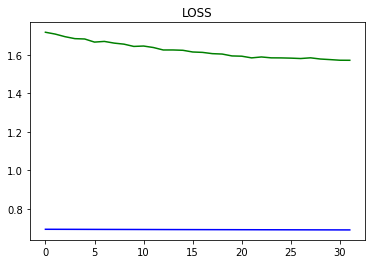

In [ ]:
#seq.load_weights("best_model.h5")

plt.figure(0)
plt.title("LOSS")
plt.plot(hist.history['loss'],'g')
plt.plot(hist.history['val_loss'],'b')
plt.show()

In [ ]:
X_train = X_train.reshape((14,10,100,100,1))
which = 12
track = X_train[which][:10, ::, ::, ::]

In [ ]:
for j in range(16):
    new_pos = seq.predict(track[np.newaxis, ::, ::, ::, ::])
    new = new_pos[::, -1, ::, ::, ::]
    track = np.concatenate((track, new), axis=0)

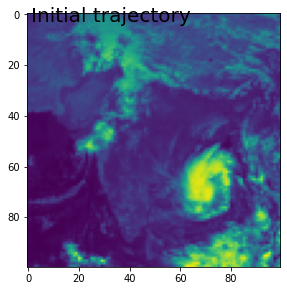

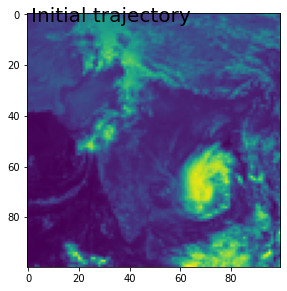

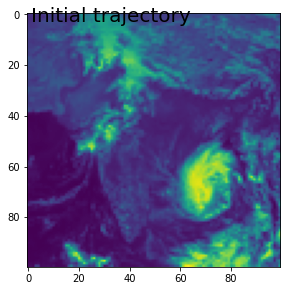

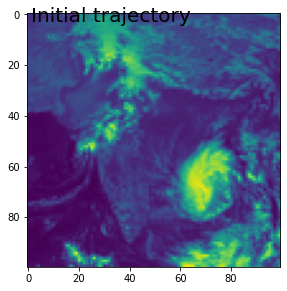

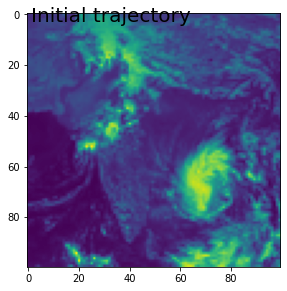

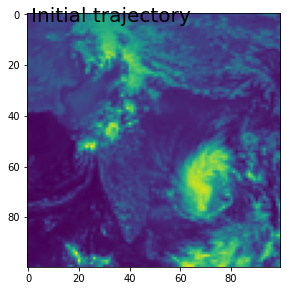

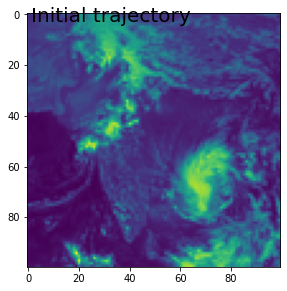

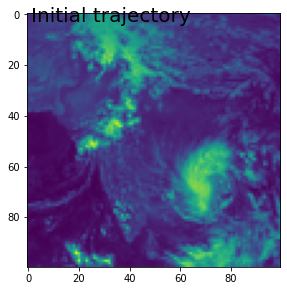

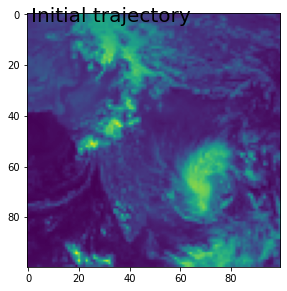

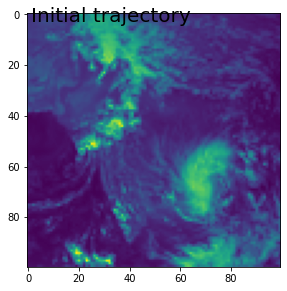

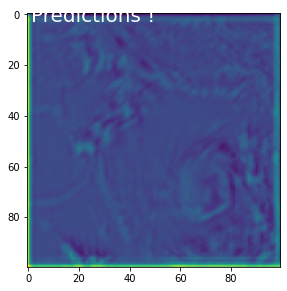

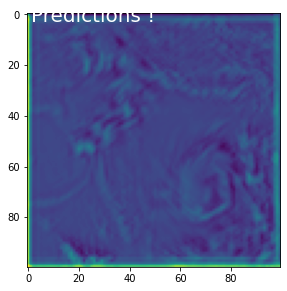

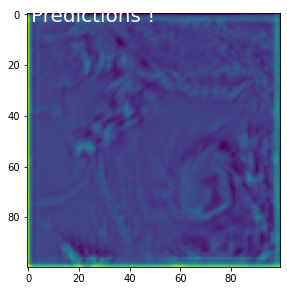

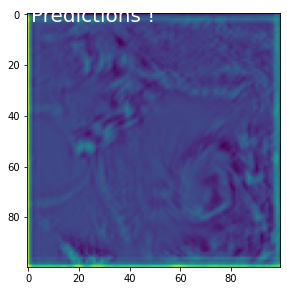

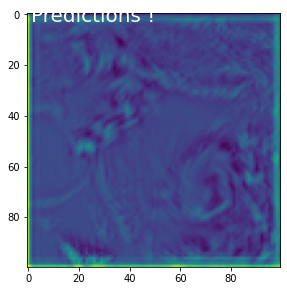

In [ ]:
# And then compare the predictions
# to the ground truth
track2 = X_train[which][::, ::, ::, ::]
for i in range(15):
    fig = plt.figure(figsize=(10, 5))

    ax = fig.add_subplot(121)

    if i >= 10:
        ax.text(1, 3, 'Predictions !', fontsize=20, color='w')
    else:
        ax.text(1, 3, 'Initial trajectory', fontsize=20)

    toplot = track[i, ::, ::, 0]

    plt.imshow(toplot)
   

    #toplot = track2[i, ::, ::, 0]
   # if i >= 2:
       # toplot = Y_train[which][i - 1,::, ::, 0]

   

Text(1, 3, 'Ground truth')

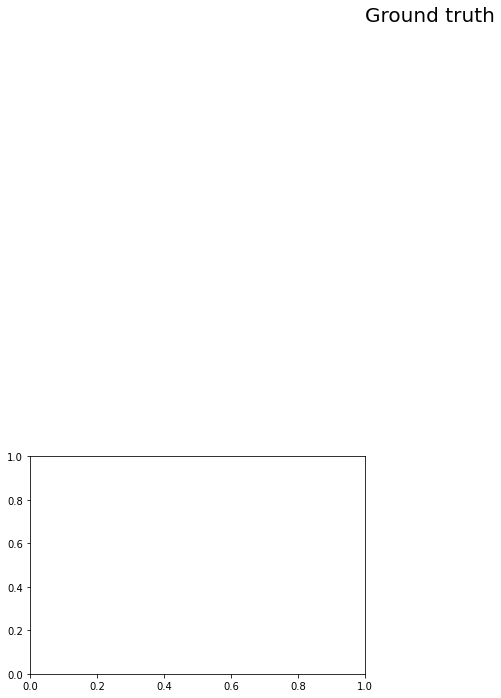

In [ ]:
ax = fig.add_subplot(122)
plt.text(1, 3, 'Ground truth', fontsize=20)

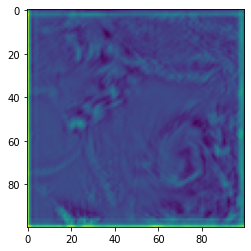

In [ ]:
plt.imshow(toplot)
plt.savefig('%i_animate.png' % (i + 1))